In [157]:
# Your name: Jared Daniel
# Your PSU Email: jjd6385

# Assignment name: Decision Tree
# Module number: 3

# 2. Load Data

In [158]:
#Import libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

In [159]:
#Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

# 3. Summarize the Dataset

In [160]:
# shape
print(dataset.shape) 

(150, 5)


In [161]:
#head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [162]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [163]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# 4. Data Visualization

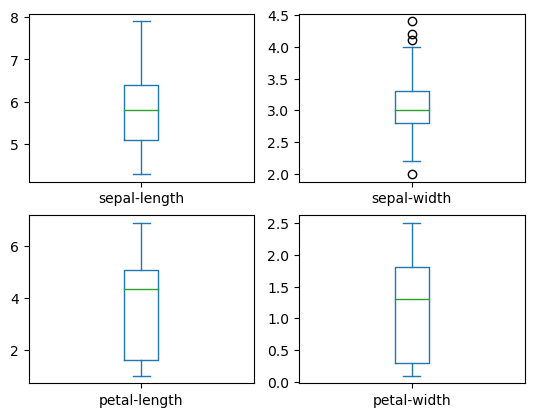

In [164]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

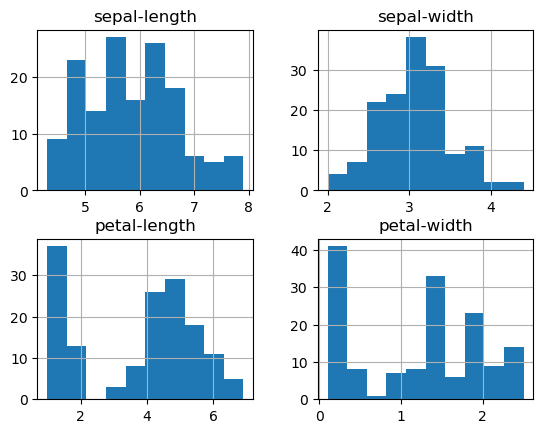

In [165]:
# histograms
dataset.hist()
plt.show()

# 5. Evaluate Algorithms

In [166]:
from sklearn.model_selection import train_test_split
# Split-out test dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=1,shuffle=True) 

In [167]:
# Import librares
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

print("Check the model on test set, print the accuracy score:")

# Select model
knn = KNeighborsClassifier()
# Train model 
knn.fit(X_train, Y_train)
# Make predictions on test dataset
predictions_knn = knn.predict(X_test)
# check the accuracy on test data
print("KNN accuracy_score:", accuracy_score(Y_test, predictions_knn))

Check the model on test set, print the accuracy score:
KNN accuracy_score: 1.0


In [168]:
# Import libraries
from sklearn.naive_bayes import GaussianNB

print("Check the model on test set, print the accuracy score:")

# Select model
gnb = GaussianNB()

# Train model 
gnb.fit(X_train, Y_train)

# Make predictions on test dataset
predictions_gnb = gnb.predict(X_test)

# Check the accuracy on test data
print("Gaussian Naive Bayes accuracy_score:", accuracy_score(Y_test, predictions_gnb))

Check the model on test set, print the accuracy score:
Gaussian Naive Bayes accuracy_score: 0.9666666666666667


In [169]:
# Import libraries
from sklearn.svm import SVC

print("Check the model on test set, print the accuracy score:")

# Select model
svm = SVC()
# Train model
svm.fit(X_train, Y_train)
# Make predictions on test dataset
predictions_svm = svm.predict(X_test)
# Check the accuracy on test data
print("SVM accuracy_score:", accuracy_score(Y_test, predictions_svm))

Check the model on test set, print the accuracy score:
SVM accuracy_score: 0.9666666666666667


In [170]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Add Algorithms in an array for better coding 
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn with validation
print("Evaluate with validation, the mean accuracy score and deviation:")
results = []
names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))



Evaluate with validation, the mean accuracy score and deviation:
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.966667 (0.040825)


Compare the model with boxplot:


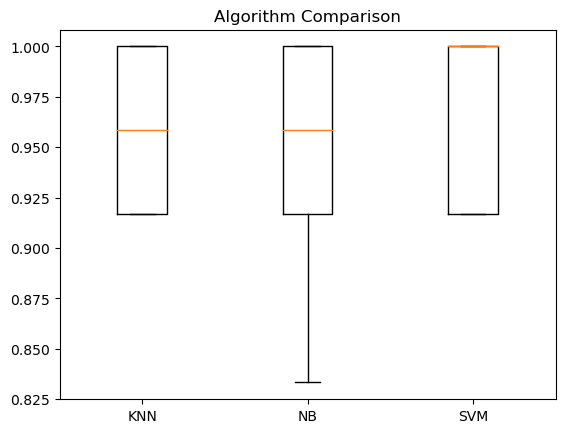

In [171]:
# Compare Algorithms
print("Compare the model with boxplot:")
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# 6. Make Predictions

In [172]:
print("KNN accuracy_score:", accuracy_score(Y_test, predictions_knn))
print("NB accuracy_score:", accuracy_score(Y_test, predictions_gnb))
print("(Chosen model) SVM accuracy_score:", accuracy_score(Y_test, predictions_svm))

KNN accuracy_score: 1.0
NB accuracy_score: 0.9666666666666667
(Chosen model) SVM accuracy_score: 0.9666666666666667


> I evaluated three different machine learning algorithms: K-Nearest Neighbors (KNN), Gaussian Naive Bayes (NB), and Support Vector Machines (SVM). I began by splitting the dataset into training and testing sets and then trained each model on the training data. The accuracy scores on the test data were impressive, with KNN achieving a perfect score of 1.0, while both NB and SVM achieved high accuracy scores of approximately 0.97. I further assessed the models using cross-validation, which revealed consistent high performance across all three algorithms, but SVM had the highest. The mean accuracy scores ranged from 0.95 to 0.97, demonstrating the robustness of these models. Finally, I compared the algorithms using a boxplot, which visually confirmed their comparable performance. Overall, this lab showcased the effectiveness of KNN, NB, and SVM in accurately predicting the target variable and provided valuable insights for selecting the most suitable algorithm for the given dataset.

# 7. Model Tuning (Bonus Points)

In [173]:
models = []
models.append(('KNN', KNeighborsClassifier(7))) # 7 seems to be the best k value
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel = 'linear', C = 10))) # a linear SVM with a smaller C seems to work the best

print("Evaluate with validation, the mean accuracy score and deviation:")
results = []
names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


Evaluate with validation, the mean accuracy score and deviation:
KNN: 0.975000 (0.038188)
NB: 0.950000 (0.055277)
SVM: 0.975000 (0.038188)


Compare the model with boxplot:


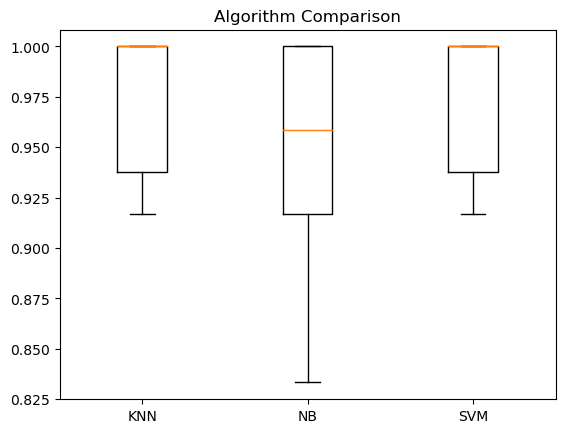

In [174]:
# Compare Algorithms
print("Compare the model with boxplot:")
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()